# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Nand Kishore Khuswaha
### Student ID: 013920192
### Email address: nandkishore.khuswaha@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

1) Regression.Boston (Example class file)

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
datafile = pd.read_csv("/Users/becoming1/Desktop/homework3_input_data.csv")

In [4]:
print(datafile)

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
5      266.0  114.0     0.0  228.0               0.0            932.0   
6      380.0   95.0     0.0  228.0               0.0            932.0   
7      380.0   95.0     0.0  228.0               0.0            932.0   
8      266.0  114.0     0.0  228.0               0.0            932.0   
9      475.0    0.0     0.0  228.0               0.0            932.0   
10     198.6  132.4     0.0  192.0               0.0            978.4   
11     198.6  132.4     0.0  192.0               0.0            978.4   
12     427.5   47.5     0.0  228.0               0.

In [5]:
features= ['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']
print(features)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


In [6]:
X, Y = datafile[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']], datafile['csMPa']


In [7]:
X.shape, Y.shape

((1030, 8), (1030,))

In [8]:
print(X)

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
5      266.0  114.0     0.0  228.0               0.0            932.0   
6      380.0   95.0     0.0  228.0               0.0            932.0   
7      380.0   95.0     0.0  228.0               0.0            932.0   
8      266.0  114.0     0.0  228.0               0.0            932.0   
9      475.0    0.0     0.0  228.0               0.0            932.0   
10     198.6  132.4     0.0  192.0               0.0            978.4   
11     198.6  132.4     0.0  192.0               0.0            978.4   
12     427.5   47.5     0.0  228.0               0.

In [9]:
concrete_df = pd.DataFrame(X, columns = features )
concrete_df['csMPa'] = Y
concrete_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


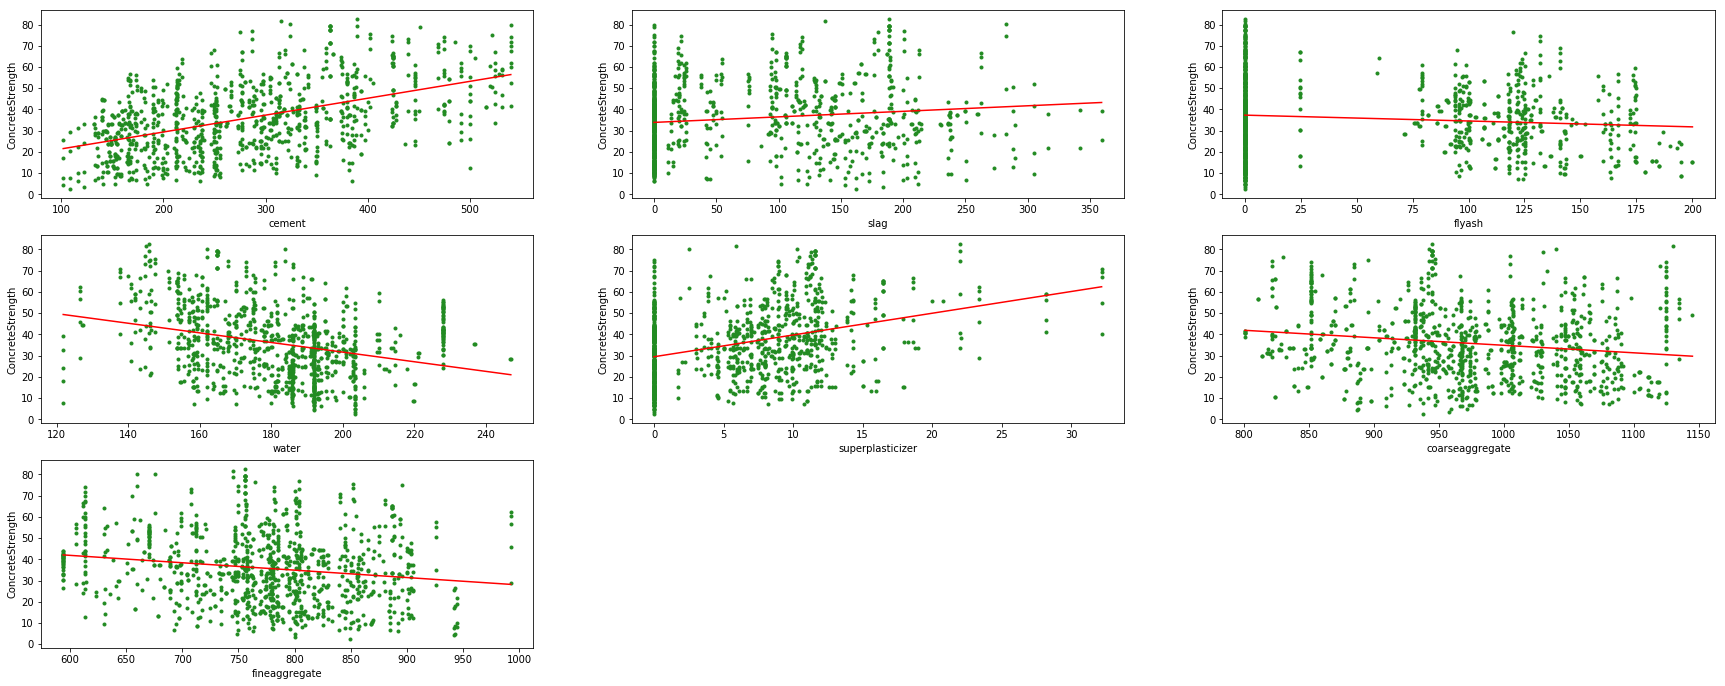

In [10]:
# all independent variables vs. the dependent variable
plt.figure(figsize=(30,20))
for i, col in enumerate(datafile.columns[0:7]):
    plt.subplot(5,3,i+1)
    x = concrete_df[col]
    y= concrete_df['csMPa']
    plt.plot(x,y, '.', color="forestgreen")
    # create linear regression line:
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    plt.xlabel(col)
    plt.ylabel('ConcreteStrength')

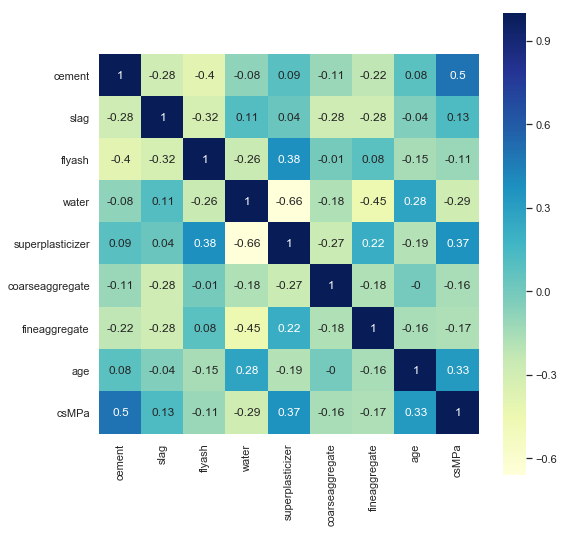

In [11]:
# correlation matrix between the independent variable
features= ['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(concrete_df.corr().round(2), square=True, cmap='YlGnBu', annot=True)


### Split into training-test sets

In [12]:
# Breaking the data into the training and test datasets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((824, 8), (824,), (206, 8), (206,))

In [13]:
# train a linear regression model
model = linear_model.LinearRegression().fit(X_train, Y_train)


In [14]:
# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [ 0.11923772  0.10881555  0.0911555  -0.14527714  0.31551104  0.02225423
  0.02248514  0.11520355]
Mean squared error: 95.62
Coefficient of determination: 0.64
